In [ ]:
#predicting the price of houses in different parts of California
# if a new place is added to the dataset we can predict the price of its houses

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.base import BaseEstimator, TransformerMixin


In [6]:
df=pd.read_csv("/Users/maryamsadeghi/MyMac/programming/DataSience/machine learning/predict_housing_prices/housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
df[["population",'households']][df['ocean_proximity']=='ISLAND']

,population,households
8314,744.0,331.0
8315,1100.0,431.0
8316,733.0,288.0
8317,341.0,160.0
8318,422.0,173.0


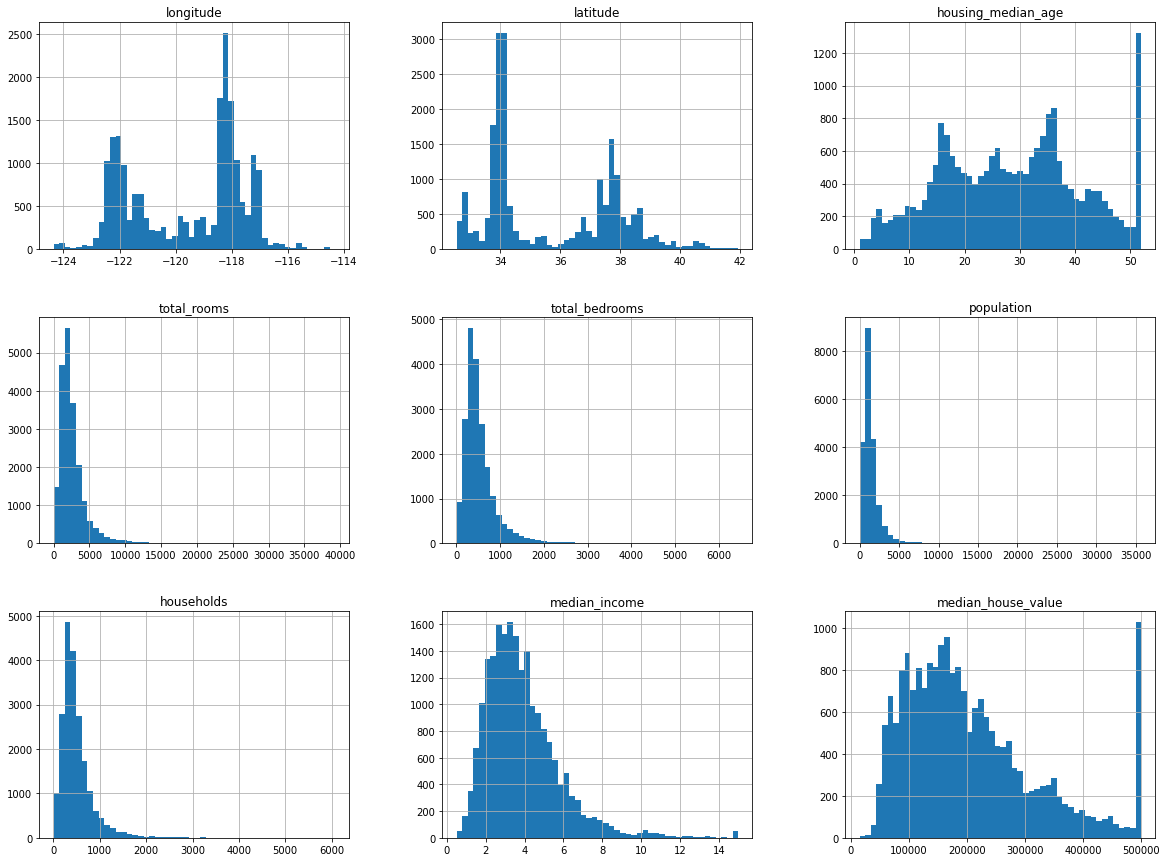

In [11]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
train_set,test_set =train_test_split(df,test_size=0.2,random_state=40)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

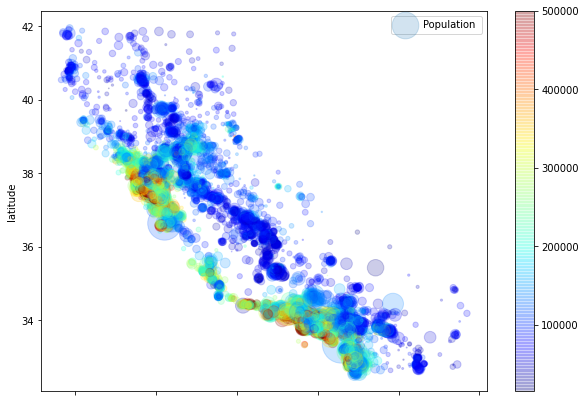

In [13]:
data=train_set.copy()
data.plot(kind='scatter',x='longitude',y='latitude',
         figsize=(10,7),alpha=0.2,
          s=data['population']/25 ,label='Population ',
         c=data['median_house_value'],cmap=plt.get_cmap("jet"))

In [14]:
#standard corelation coefficient
data.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689565
total_rooms           0.136670
housing_median_age    0.104681
households            0.065653
total_bedrooms        0.049700
population           -0.022397
longitude            -0.048351
latitude             -0.142562
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

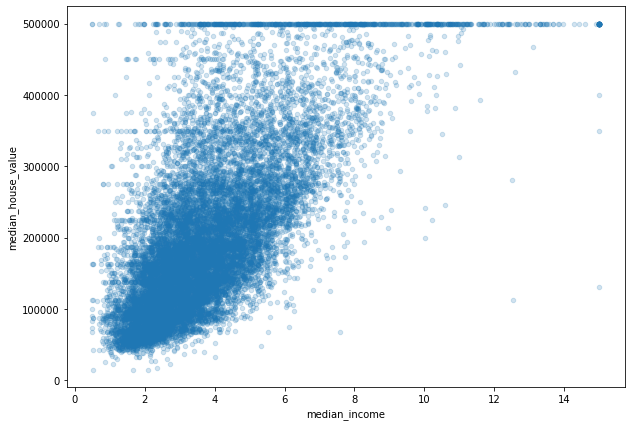

In [15]:
data=train_set.copy()
data.plot(kind='scatter',x='median_income',y='median_house_value',
         figsize=(10,7),alpha=0.2)

In [16]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,63300.0,INLAND
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,174300.0,INLAND
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,350000.0,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,268800.0,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,385900.0,<1H OCEAN


In [17]:
data['total_rooms_per_households']=data['total_rooms']/data['households']
data['total_bedrooms_per_rooms']=data['total_bedrooms']/data['total_rooms']
data['population_per_household']=data['population']/data['households']


In [18]:
data.corr()["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.689565
total_rooms_per_households    0.143220
total_rooms                   0.136670
housing_median_age            0.104681
households                    0.065653
total_bedrooms                0.049700
population                   -0.022397
population_per_household     -0.032061
longitude                    -0.048351
latitude                     -0.142562
total_bedrooms_per_rooms     -0.256402
Name: median_house_value, dtype: float64

In [19]:
#--------------------------------prepare the data ------------------------------------------
#===========  Numerical data ==> missing values, 
#=============================== custom transformers, 
#=============================== feature scaling

#==========  Categorical data and text data ==> 1- LabelEncoder
#============================================== 2- OneHotEncoder


#-----> split x_train , y_train

train_x=train_set.copy()
df_label=train_x["median_house_value"].copy()
train_x.drop("median_house_value",axis=1,inplace=True)

train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9226 to 11590
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16352 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [20]:
train_x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,INLAND
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,INLAND
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,<1H OCEAN


In [21]:
train_x_num=train_x.drop("ocean_proximity",axis=1)

In [22]:
#missing values 1.drop rows 2.drop column 3.replace
#  train_x_num.dropna(subset['total_bedrooms'])   #option1
#  train_x_num.drop('total_bedrooms',axis=1)   #option2
#  find a value ==> replace the value with null #option3
# use option 3
#total_bedrooms_mean=train_x['total_bedrooms'].mean()
#train_x_num["total_bedrooms"].fillna(total_bedrooms_mean)


In [23]:
#=========================== simpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(train_x_num)
X=imputer.transform(train_x_num)
train_x_num_tr=pd.DataFrame(X,columns=train_x_num.columns)
train_x_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [24]:
#========================== custom transforms ==========================
## Custom transformer for creating new attributes by combining existing
#attributes

rooms_ind,bedrooms_ind,populations_ind,household_ind=3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ind]/X[:,household_ind]
        population_per_household=X[:,populations_ind]/X[:,household_ind]
        bedrooms_per_room=X[:,bedrooms_ind]/X[:,rooms_ind]
        return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room]
    
custom=CombinedAttributesAdder()
data_customs_tmp=custom.transform(train_x_num_tr.values)
data_custom_tr=pd.DataFrame(data_customs_tmp)

columns=list(train_x_num_tr.columns)
columns.append("rooms_per_household")
columns.append("population_per_household")
columns.append("bedrooms_per_room")

data_custom_tr.columns=columns


In [25]:
data_custom_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,5.599379,3.220497,0.193844
1,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,5.857143,2.704185,0.179847
2,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,2.020725,2.253886,0.510256
3,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,4.310078,1.908915,0.260791
4,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,5.791367,1.838129,0.172671


In [26]:
#====================== Feature scaling : 1- Normalization [0,1] => negative point => outliers positive => neural networks
#======================================== 2- Standardisation => deviation variance

#=====> standardization => StandardScaler
from sklearn.preprocessing import StandardScaler

feature_scal=StandardScaler()
data_num_scaled_tr=pd.DataFrame(feature_scal.fit_transform(data_custom_tr.values), columns= data_custom_tr.columns)


data_num_scaled_tr.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-0.237227,0.608845,-1.405277,0.444283,0.386512,0.564695,0.376927,-0.618127,0.063178,0.029403,-0.307264
1,-0.736081,1.577234,-0.606755,0.652239,0.460817,0.389609,0.505244,0.495515,0.162274,-0.050753,-0.519404
2,0.660709,-0.733801,0.351472,-1.032063,-0.811955,-0.870134,-0.804112,-1.407436,-1.312619,-0.120661,4.488539
3,0.820342,-0.930286,-0.287346,-0.190142,0.101277,-0.388648,0.041732,-0.387908,-0.432488,-0.174217,0.707449
4,0.605835,-0.701054,0.830585,-0.472006,-0.622597,-0.803601,-0.581522,0.246620,0.136987,-0.185207,-0.628176


In [27]:
#====================== LabelEncoder => good for order categories(dependent)
#============ error => useless 

from sklearn.preprocessing import LabelEncoder

encoder =LabelEncoder()

data_cat_encoded= pd.DataFrame(encoder.fit_transform(train_x[["ocean_proximity"]]), columns=["ocean_proximity"])

data_cat_encoded.head()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,ocean_proximity
0,1
1,1
2,0
3,0
4,0


In [28]:
#=================== OneHotEncoder => independent ,good for low categories

from sklearn.preprocessing import OneHotEncoder

encoder_hot= OneHotEncoder(sparse=False)
data_cat_1hot_tmp=encoder_hot.fit_transform(train_x[["ocean_proximity"]])
data_cat_1hot=pd.DataFrame(data_cat_1hot_tmp)
data_cat_1hot.columns=encoder_hot.get_feature_names(["prox"])

data_cat_1hot.head()

,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [29]:
final= pd.concat([data_num_scaled_tr,data_cat_1hot],axis=1)

final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,-0.237227,0.608845,-1.405277,0.444283,0.386512,0.564695,0.376927,-0.618127,0.063178,0.029403,-0.307264,0.0,1.0,0.0,0.0,0.0
1,-0.736081,1.577234,-0.606755,0.652239,0.460817,0.389609,0.505244,0.495515,0.162274,-0.050753,-0.519404,0.0,1.0,0.0,0.0,0.0
2,0.660709,-0.733801,0.351472,-1.032063,-0.811955,-0.870134,-0.804112,-1.407436,-1.312619,-0.120661,4.488539,1.0,0.0,0.0,0.0,0.0
3,0.820342,-0.930286,-0.287346,-0.190142,0.101277,-0.388648,0.041732,-0.387908,-0.432488,-0.174217,0.707449,1.0,0.0,0.0,0.0,0.0
4,0.605835,-0.701054,0.830585,-0.472006,-0.622597,-0.803601,-0.581522,0.246620,0.136987,-0.185207,-0.628176,1.0,0.0,0.0,0.0,0.0


In [30]:
final.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'population_per_household', 'bedrooms_per_room',
       'prox_<1H OCEAN', 'prox_INLAND', 'prox_ISLAND', 'prox_NEAR BAY',
       'prox_NEAR OCEAN'],
      dtype='object')

In [31]:
#=========================== using pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import FeatureUnion

rooms_ind,bedrooms_ind,populations_ind,household_ind=3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ind]/X[:,household_ind]
        population_per_household=X[:,populations_ind]/X[:,household_ind]
        bedrooms_per_room=X[:,bedrooms_ind]/X[:,rooms_ind]
        return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room]
    
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,atributes_name):
        self.atributes_name=atributes_name
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.atributes_name].values

df=train_set.copy()
df_label=df["median_house_value"].copy()
df=df.drop("median_house_value",axis=1)

df_num=df.drop(["ocean_proximity"],axis=1)
num_attrs=list(df_num)
cat_attrs=["ocean_proximity"]
num_pipeline=Pipeline([
    ("selector",DataFrameSelector(num_attrs)),
    ("imputer",SimpleImputer(missing_values=np.nan,strategy="median")),
    ("attribs_adder",CombinedAttributesAdder()),
    ("std_scaler",StandardScaler())
])

cat_pipeline=Pipeline([
    ("selector", DataFrameSelector(cat_attrs)),
    ("oneHotEncoder", OneHotEncoder(sparse=False))
])

full_pipeline=FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline)
])

housing_prepared=full_pipeline.fit_transform(df)
housing_prepared_df=pd.DataFrame(housing_prepared,columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'population_per_household', 'bedrooms_per_room',
       'prox_<1H OCEAN', 'prox_INLAND', 'prox_ISLAND', 'prox_NEAR BAY',
       'prox_NEAR OCEAN'])

In [32]:
housing_prepared_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,-0.237227,0.608845,-1.405277,0.444283,0.386512,0.564695,0.376927,-0.618127,0.063178,0.029403,-0.307264,0.0,1.0,0.0,0.0,0.0
1,-0.736081,1.577234,-0.606755,0.652239,0.460817,0.389609,0.505244,0.495515,0.162274,-0.050753,-0.519404,0.0,1.0,0.0,0.0,0.0
2,0.660709,-0.733801,0.351472,-1.032063,-0.811955,-0.870134,-0.804112,-1.407436,-1.312619,-0.120661,4.488539,1.0,0.0,0.0,0.0,0.0
3,0.820342,-0.930286,-0.287346,-0.190142,0.101277,-0.388648,0.041732,-0.387908,-0.432488,-0.174217,0.707449,1.0,0.0,0.0,0.0,0.0
4,0.605835,-0.701054,0.830585,-0.472006,-0.622597,-0.803601,-0.581522,0.246620,0.136987,-0.185207,-0.628176,1.0,0.0,0.0,0.0,0.0


In [33]:
# choosing machine learning model => predicting value => supervised 
#===============================  => exact value -> regression
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared_df,df_label)

sample_data_prepared=housing_prepared_df.iloc[:4]
print(f"predicted values : \n{lin_reg.predict(sample_data_prepared)}")

sample_data_labeled=df_label.iloc[:4]
print(f"real values :\n {list(sample_data_labeled)}")



predicted values : 
[ 86181.71667612 164476.41705072 152754.52938804 215859.98327272]
real values :
 [63300.0, 174300.0, 350000.0, 268800.0]


In [34]:
# RMSE => Root Mean Squred Error
from sklearn.metrics import mean_squared_error
housing_predictions=lr.predict(housing_prepared_df)
lin_mse=mean_squared_error(housing_predictions,df_label)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

NameError: name 'lr' is not defined

In [35]:
# decision tree regression model
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df,df_label)
housing_predictions=tree_reg.predict(housing_prepared_df)
lin_mse=mean_squared_error(df_label,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.0

In [36]:
# tool to minimize overfitting and underfiting
#Cross-validation is a technique for evaluating a machine learning model and testing its performance.
#It helps to compare and select an appropriate model for the specific predictive modeling problem.
from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg,housing_prepared_df,df_label,scoring="neg_mean_squared_error",cv=10)

scores_rmse=np.sqrt(-scores)

def ScoreDisplay(scores,model):
    print(f'model name : \n{model}')
    print(f" scores : {scores}")
    print(f" mean_ scores : {scores.mean()}")
    print(f' std_scores : {scores.std()}')


ScoreDisplay(scores_rmse,tree_reg)


model name : 
DecisionTreeRegressor()
 scores : [71555.36271119 72231.34941988 72727.99211516 70654.39396871
 69684.53142703 74038.51963918 70218.37320618 68912.89437268
 67813.40093146 66517.0636158 ]
 mean_ scores : 70435.38814072707
 std_scores : 2189.1396861420417


In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)

pol_featured=poly.fit_transform(housing_prepared_df)
scores=cross_val_score(lin_reg,pol_featured,df_label,scoring="neg_mean_squared_error",cv=10)

rmse=np.sqrt(-scores)

print(rmse.mean())

73047936560.77905


In [39]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared_df,df_label)
scores=cross_val_score(forest_reg,housing_prepared_df,df_label,scoring="neg_mean_squared_error",cv=10)
rmse=np.sqrt(-scores)
ScoreDisplay(rmse,"RandomForestRegressor")

model name : 
RandomForestRegressor
 scores : [50955.32620172 50621.79753462 51138.0008632  48896.88516012
 50731.8639196  52901.94417181 50217.82460721 48044.31606995
 48913.02891062 46660.82035321]
 mean_ scores : 49908.18077920495
 std_scores : 1699.6340716986367


In [41]:
# using GridSearchCV to find the best parameters for an algorithm
from sklearn.model_selection import GridSearchCV

param_grid = [{"n_estimators":[3,4,6,10,30],"max_features":[2,6,8,15]}]

forest_reg=RandomForestRegressor()
grid_search =GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared_df,df_label)
print(f" best Parameters : {grid_search.best_params_}")
print(f" best estimator : {grid_search.best_estimator_}")

 best Parameters : {'max_features': 6, 'n_estimators': 30}
 best estimator : RandomForestRegressor(max_features=6, n_estimators=30)


In [42]:
results=grid_search.cv_results_

for mean_score, params in zip(results['mean_test_score'],results["params"]):
    print(np.sqrt(- mean_score),params)

63855.519112761845 {'max_features': 2, 'n_estimators': 3}
60023.23520839908 {'max_features': 2, 'n_estimators': 4}
57478.04488191953 {'max_features': 2, 'n_estimators': 6}
55570.99698733493 {'max_features': 2, 'n_estimators': 10}
52091.98882911248 {'max_features': 2, 'n_estimators': 30}
58498.109721183704 {'max_features': 6, 'n_estimators': 3}
56067.046226069055 {'max_features': 6, 'n_estimators': 4}
53489.242589574125 {'max_features': 6, 'n_estimators': 6}
51823.31405767856 {'max_features': 6, 'n_estimators': 10}
49603.65214971681 {'max_features': 6, 'n_estimators': 30}
58461.73631700893 {'max_features': 8, 'n_estimators': 3}
55554.935168680124 {'max_features': 8, 'n_estimators': 4}
54697.044093129065 {'max_features': 8, 'n_estimators': 6}
51526.25528232212 {'max_features': 8, 'n_estimators': 10}
49615.82536601578 {'max_features': 8, 'n_estimators': 30}
58681.706658529045 {'max_features': 15, 'n_estimators': 3}
56292.1883847979 {'max_features': 15, 'n_estimators': 4}
54262.99220457524

In [50]:
# test the final model on the test set

final_model=grid_search.best_estimator_
x= test_set.drop("median_house_value",axis=1)
y=test_set["median_house_value"].copy()

#preprocessing test data
x_prepared=full_pipeline.transform(x)

final_predictions=final_model.predict(x_prepared)

final_mse=mean_squared_error(y,final_predictions)

final_rmse=np.sqrt(final_mse)


final_rmse

50265.98498749299

In [51]:
# for new datas predictions
x_prepared=full_pipeline.transform(x)

final_predictions=final_model.predict(x_prepared)